# Finite Difference

## Pengenalan Difference
``Diff`` disini mengacu pada selisih antara elemen elemen pada sebuah data array atau list. Misal sebuah data $X$ tertentu memiliki bentuk

``X = [x1,x2,....,xn]``

maka $Δx_i$ yang merupakan elemen baru array $X'$ adalah

$\Delta x_i=x_{i+1}-x_{i}$

``X' = [deltax1,deltax2,....,deltaxn_1]``


In [41]:
import matplotlib.pyplot as plt
import numpy as np

x = [1,3,5,6,9,12]

np.diff(x)

array([2, 2, 1, 3, 3])

Jika sebuah array diterapkan atribut ``diff`` diatas kemudian per elemennya dibagi dengan elemen lain didapatkan nilai differensial atau turunan dari 2 array (fungsi) tersebut

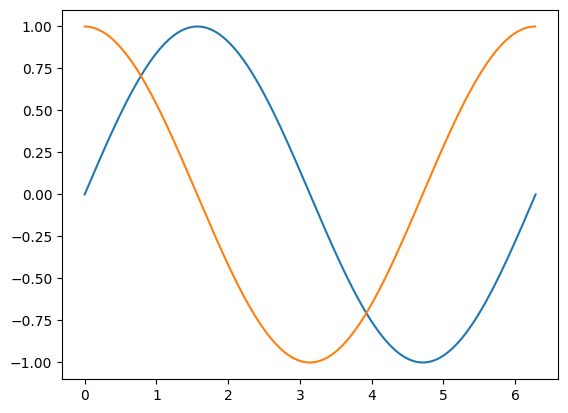

In [42]:
N_grid = 1000
x = np.linspace(0,2*np.pi,N_grid)
y = np.sin(x)


turunan1 = np.diff(y)/np.diff(x)
plt.plot(x,y)
plt.plot(x[:-1],turunan1)

Operator turunan dapat diubah menjadi operator matriks 

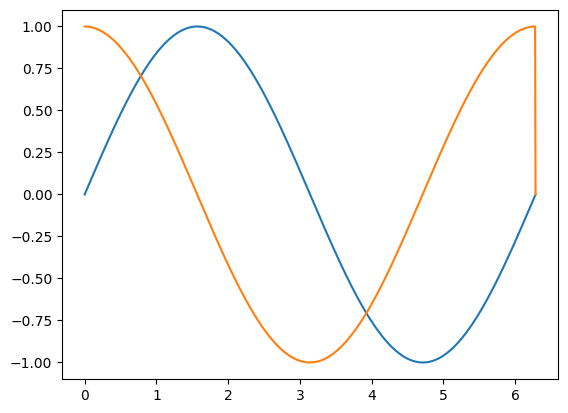

In [45]:
def first_derivative(n,dx):
    A = np.zeros((n,n))
    for i in range(n-1):
        A[i,i+1]=1
        A[i,i]=-1
        A[-1,-1]=-1
    return A/dx
dx = x[1]-x[0]
dydx = first_derivative(N_grid,dx)@y

plt.plot(x,y)
plt.plot(x,dydx)

## Menyelesaikan Persamaan diferensial
Operator turunan dapat diubah menjadi operator matriks yang bisa menyelesaikan beberapa persamaan diferensial seperti gerak jatuh bebas dan persamaan osilasi
### Persamaan gerak jatuh bebas
$\frac{d y}{dx}=-g$

idenya adalah menyusun persamaan diatas menjadi sistem persamaan linier

$A y=b$   dengan $A= \frac{d}{dx}$ dan $b = -g$

In [46]:
def second_derivative(N,dx):
    A = np.zeros((N,N))
    for i in range(N-1):
        A[i,i]=-2
        A[i+1,i]=1
        A[i,i+1]=1
        A[-1,-1]=-2
    return A/dx**2

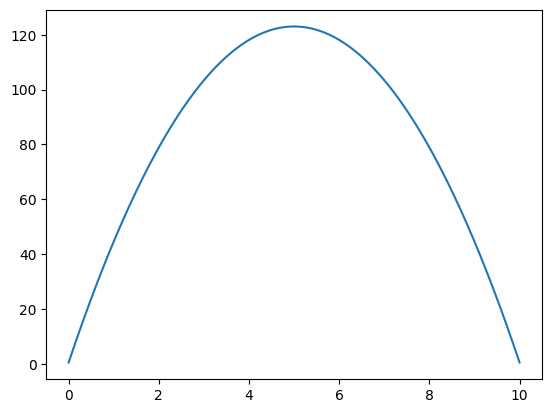

In [47]:
#waktu 
t = np.linspace(0,10,N_grid)
dt = t[1]-t[0]

A = second_derivative(N_grid,dt)
b = -9.8*np.ones((N_grid,1))

#boundary 
b[0]=0 #kondisi awal dari y = 0
b[-1]=0 #kondisi akhir di y = 0

sol = np.linalg.solve(A,b)
plt.plot(t,sol)

### Menyelesaikan gerak harmonik sederhana

$\frac{d^2 y}{dt^2}+\omega^2 y = 0$ dimana $A=\frac{d^2}{dt^2}+I\omega^2$ dan $b=$ vektor kolom 0

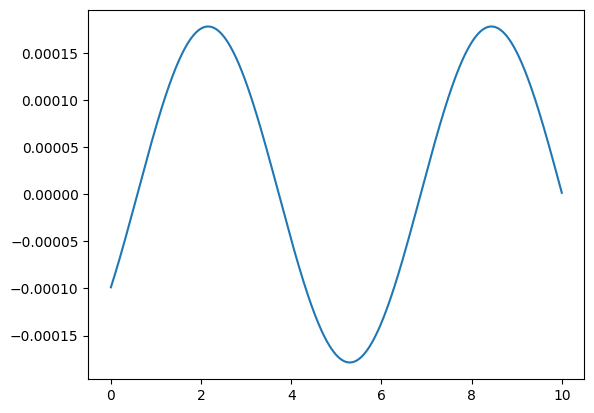

In [37]:
A = second_derivative(N_grid,dt) + np.eye(N_grid,N_grid)
b = np.zeros((N_grid,1))

# #boundary 
b[0] = 1 #kondisi awal dari y = 0
sol = np.linalg.solve(A,b)
plt.plot(t,sol)

## Menyelesaikan persamaan Schrodinger Dengan Finite Difference

Dalam kode ini, solusi persamaan schrodinger akan dicari dengan Metode finite difference pada turunan fungsi gelombangnya. Persamaan Schrodinger secara umum diberikan dalam bentuk persamaan

$\hat{H}\psi=E\psi$

dengan bentuk $H$ diatas adalah $ \hat{H} = \frac{\hbar^2}{2m}\nabla^2 +\hat{V}$

Idenya adalah operator differensial diatas akan direpresentasikan ke dalam bentuk matriks sehingga nilai fungsi gelombang akan dicari melalui persamaan karakteristik dari Persamaan eigen.


In [48]:
#initialisasi parameter
N = 100
x = np.linspace(0.0, 2.0, N)
dx = x[1] - x[0]
hbar = 1.0
m_e = 1.0

forward derivation dinyatakan dalam persamaan

$f_{forward}'(x) \approx \frac{f(x+h) - f(x)}{h}=\frac{f_{i+1} - f_i}{h}$

maka bentuk representasi matriksnya


$F'_{forward} = \begin{pmatrix}
-1 & 0 & 0 & \cdots & 0 \\
1 & -1 & 0 & \cdots & 0 \\
0 & 1 & -1 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & \cdots & 1 & -1 & 0 \\
0 & \cdots & 0 & 1 & -1 \\
\end{pmatrix} \begin{pmatrix}
 f_1 \\
 f_2 \\
 f_3 \\
 f_4 \\
 \vdots \\
 f_{n-1} \\
 f_{n} \\
\end{pmatrix}$


dan untuk backward derivation

$f_{backward}'(x) \approx \frac{f(x) - f(x-h)}{h}=\frac{f_i - f_{i-1}}{h}$

representasi matriksnya adlah

$F'_{backward} = \begin{pmatrix}
-1 & 1 & 0 & \cdots & 0 \\
0 & -1 & 1 & \cdots & 0 \\
0 & 0 & -1 & \cdots & 0 \\
0 & 0 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & \cdots & 0 & -1 & 1 \\
0 & \cdots & 0 & 0 & -1 \\
\end{pmatrix}\begin{pmatrix}
 f_1 \\
 f_2 \\
 f_3 \\
 f_4 \\
 \vdots \\
 f_{n-1} \\
 f_{n} \\
\end{pmatrix}$



dan menggunakan 2 representasi matriks diatas didapatkan bentuk turunan keduanya yakni


$F''=F'_{backward} - F'_{forward} = \begin{pmatrix}
-2 & 1 & 1 & \cdots & 0 \\
1 & -2 & 1 & \cdots & 0 \\
0 & 1 & -2 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & \cdots & 1 & -2 & 1 \\
0 & \cdots & 0 & 1 & -2 \\
\end{pmatrix}\begin{pmatrix}
 f_1 \\
 f_2 \\
 f_3 \\
 f_4 \\
 \vdots \\
 f_{n-1} \\
 f_{n} \\
\end{pmatrix}$
dari definisi ini didapatkan bentuk operator hamiltoniannya berupa

$H\Psi= \frac{ħ^2}{2m}\begin{pmatrix}
-2 & 1 & 1 & \cdots & 0 \\
1 & -2 & 1 & \cdots & 0 \\
0 & 1 & -2 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & \cdots & 1 & -2 & 1 \\
0 & \cdots & 0 & 1 & -2 \\
\end{pmatrix}\begin{pmatrix}
 \psi_1 \\
 \psi_2 \\
 \psi_3 \\
 \psi_4 \\
 \vdots \\
 \psi_{n-1} \\
 \psi_{n} \\
\end{pmatrix} + V\begin{pmatrix}
 \psi_1 \\
 \psi_2 \\
 \psi_3 \\
 \psi_4 \\
 \vdots \\
 \psi_{n-1} \\
 \psi_{n} \\
\end{pmatrix} = (T+V)\Psi$

In [2]:
def T(N):
    T_second_derivatif = np.zeros((N, N))
    for i in range(N):
        T_second_derivatif[i, i] = -2.0
        if i < N - 1:
            T_second_derivatif[i + 1, i] = 1.0
            T_second_derivatif[i, i + 1] = 1.0
    return T_second_derivatif

def V_potential_well(N):
    V = np.zeros((N, N))
    return V

H = -T(N) * (hbar**2) / (2.0 * m_e * dx**2) + V_potential_well(N)

Persamaan sebelumnya berbentuk 

$H\Psi = E_n \Psi$

persamaan diatas adalah persamaan eigen dimana nilai eigennya sendiri adalah energi eksitasi ke $-n$

In [3]:
E, psi = np.linalg.eigh(H)

psi1 = np.abs(psi[:, 0])
psi2 = np.abs(psi[:, 1])
psi3 = np.abs(psi[:, 2])

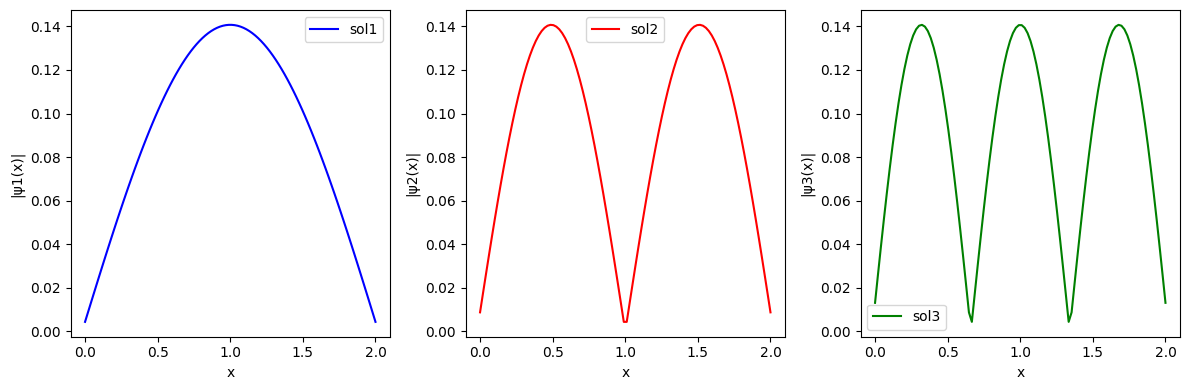

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, psi1, label="sol1", color="blue")
axes[0].set_xlabel("x")
axes[0].set_ylabel("|ψ1(x)|")
axes[0].legend()

axes[1].plot(x, psi2, label="sol2", color="red")
axes[1].set_xlabel("x")
axes[1].set_ylabel("|ψ2(x)|")
axes[1].legend()

axes[2].plot(x, psi3, label="sol3", color="green")
axes[2].set_xlabel("x")
axes[2].set_ylabel("|ψ3(x)|")
axes[2].legend()
plt.tight_layout()
plt.show()

## Normalisasi fungsi gelombang 

Secara analitik, fungsi gelombang memiliki fungsi berbentuk 

$\Psi(x) = A \sin{\frac{n\pi x}{L}} = A \psi (x)$

dan A dapat dicari dengan syarat normalisasi

$\int_{-\infty}^{\infty}|\Psi(x)|^2 dx = 1 \iff \sum |\Psi(x)|^2 \Delta x = 1$

$|A|^2 = \frac{1}{\sum |\psi(x)|^2 \Delta x}$

In [5]:
Norm = 1/np.sqrt(np.sum(psi1**2) * dx)
psi1_norm = psi1 * Norm
norm_check = np.sum(psi1_norm**2 *dx) 
norm_check

np.float64(0.9999999999999998)

## Membandingkan nilai eigen dengan Teori

energi tingkat eksitasi ke $-n$ dinyatakan dalam

$E_n = \frac{n^2 \pi^2 \hbar^2}{2mL^2}$

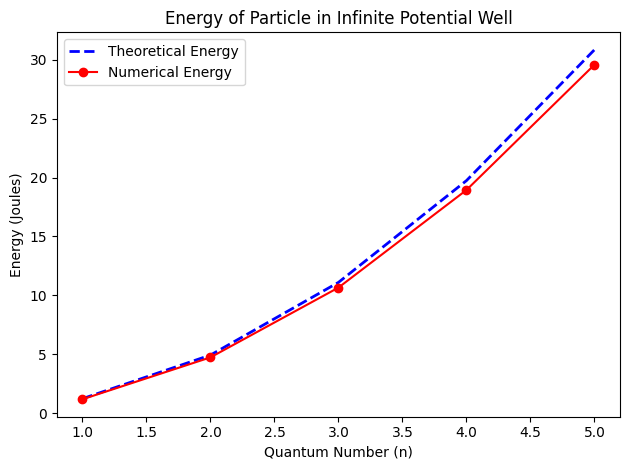

In [6]:
n_values = np.arange(1, 6) 
L = 2.0
E_theory = (n_values**2 * (np.pi**2) * (hbar**2)) / (2.0 * m_e * L**2)
E_sorted = np.sort(E)

plt.figure()
plt.plot(n_values, E_theory, label="Theoretical Energy",color="blue", linewidth=2, linestyle="--")
plt.plot(np.arange(1, 6), E_sorted[:5],label="Numerical Energy",color="red", marker="o", markersize=6)
plt.xlabel("Quantum Number (n)")
plt.ylabel("Energy (Joules)")
plt.title("Energy of Particle in Infinite Potential Well")
plt.legend()
plt.tight_layout()

## Membandingkan dengan hasil Teori

In [7]:
pi = np.pi # Definisi pi
def wave_function(n, x, L):
    return np.sin(n * np.pi * x / L)
def norm_wave(psi):
    Norm_local = 1.0 / np.sqrt(np.sum(psi**2) * dx)
    return psi * Norm_local

psi_1_theory = wave_function(1, x, L)

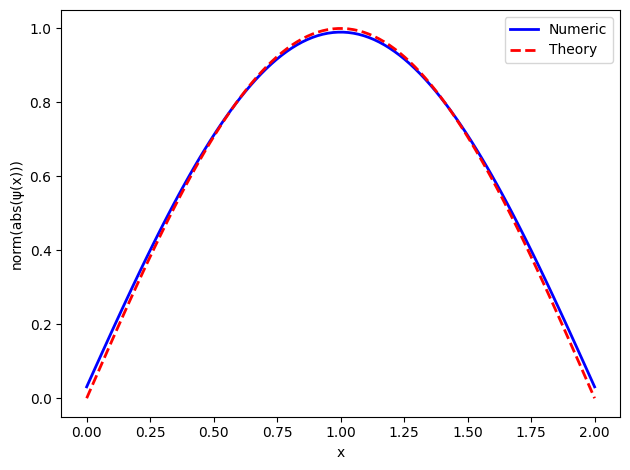

In [8]:
plt.figure()
plt.plot(x,norm_wave(np.abs(psi1)),
    label="Numeric",
    color="blue",
    linewidth=2,
)
plt.plot(x,norm_wave(np.abs(psi_1_theory)),
    label="Theory",
    color="red",
    linestyle="--",
    linewidth=2,
)
plt.xlabel("x")
plt.ylabel("norm(abs(ψ(x)))")
plt.legend()
plt.tight_layout()

## Osilator Harmonik

bentuk potensialnya berupa 

$V_i = \frac{1}{2} m x_i^2$

dan berupa matriks nya adalah 

$\textbf{V}=\begin{pmatrix}
x_0^2 & 0 & 0 & \cdots & 0 \\
0 & x_1^2 & 0 & \cdots & 0 \\
0 & 0 & x_2^2 & \cdots & 0 \\
0 & 0 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & \cdots & 0 & x_{N-1}^2 & 0 \\
0 & \cdots & 0 & 0 & -x_N^2 \\
\end{pmatrix}$

In [9]:
# Sekarang setup baru untuk osilator harmonik (domain -1 sampai 1)
N = 100
x = np.linspace(-1.0, 1.0, N)
dx = x[1] - x[0]

hbar = 1.0
m_e = 1.0

omega = 1.0
potential_harmonic = 0.5 * m_e * omega**2 * x**2

In [10]:
def V_oscillator(N, x):
    V = np.zeros((N, N))
    for i in range(N):
        V[i, i] = 0.5 * m_e * omega**2 * x[i] ** 2
    return V

In [11]:
H2 = -T(N) * (hbar**2) / (2.0 * m_e * dx**2) + V_oscillator(N, x)
E2, psi_o = np.linalg.eigh(H2)

psio1 = norm_wave(np.abs(psi_o[:, 0]))
psio2 = norm_wave(np.abs(psi_o[:, 1]))
psio3 = norm_wave(np.abs(psi_o[:, 2]))
psio4 = norm_wave(np.abs(psi_o[:, 3]))

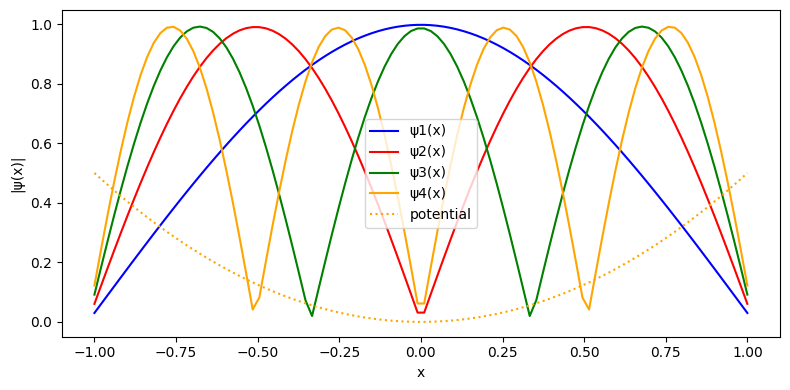

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(x, psio1, label="ψ1(x)", color="blue")
plt.plot(x, psio2, label="ψ2(x)", color="red")
plt.plot(x, psio3, label="ψ3(x)", color="green")
plt.plot(x, psio4, label="ψ4(x)", color="orange")
plt.plot(x, potential_harmonic, label="potential", color="orange", linestyle=":")
plt.xlabel("x")
plt.ylabel("|ψ(x)|")
plt.legend()
plt.tight_layout()

## Membangung solusi pada 2 dimensi 

solusi 2D dapat dibangun oleh solusi 1 dimensi diatas

$\Psi_{n,m}(x,y) = \Psi_n \Psi_m$ atau $\Psi_{n,m}(x,y) = \Psi_n \Psi_m^T$

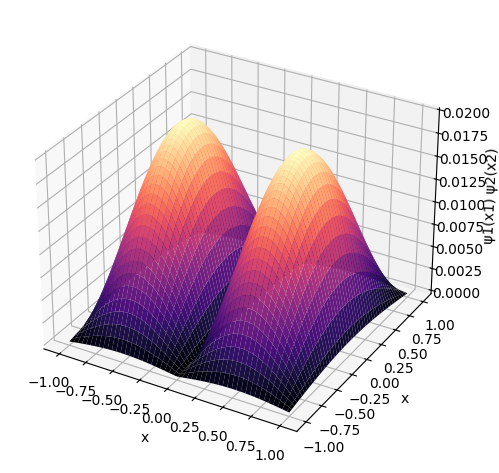

In [13]:
psi21 = np.outer(psi1, psi2)

X, Y = np.meshgrid(x, x)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X, Y, psi21, cmap="magma")
ax.set_xlabel("x")
ax.set_ylabel("x")
ax.set_zlabel("ψ1(x1) ψ2(x2)")
plt.tight_layout()


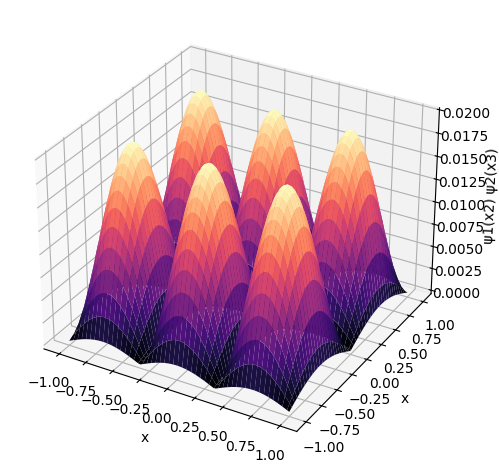

In [14]:
psi23 = np.outer(psi2, psi3)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X, Y, psi23, cmap="magma")
ax.set_xlabel("x")
ax.set_ylabel("x")
ax.set_zlabel("ψ1(x2) ψ2(x3)")
plt.tight_layout()